<a href="https://colab.research.google.com/github/zugbaa/racunalni_vid/blob/main/fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

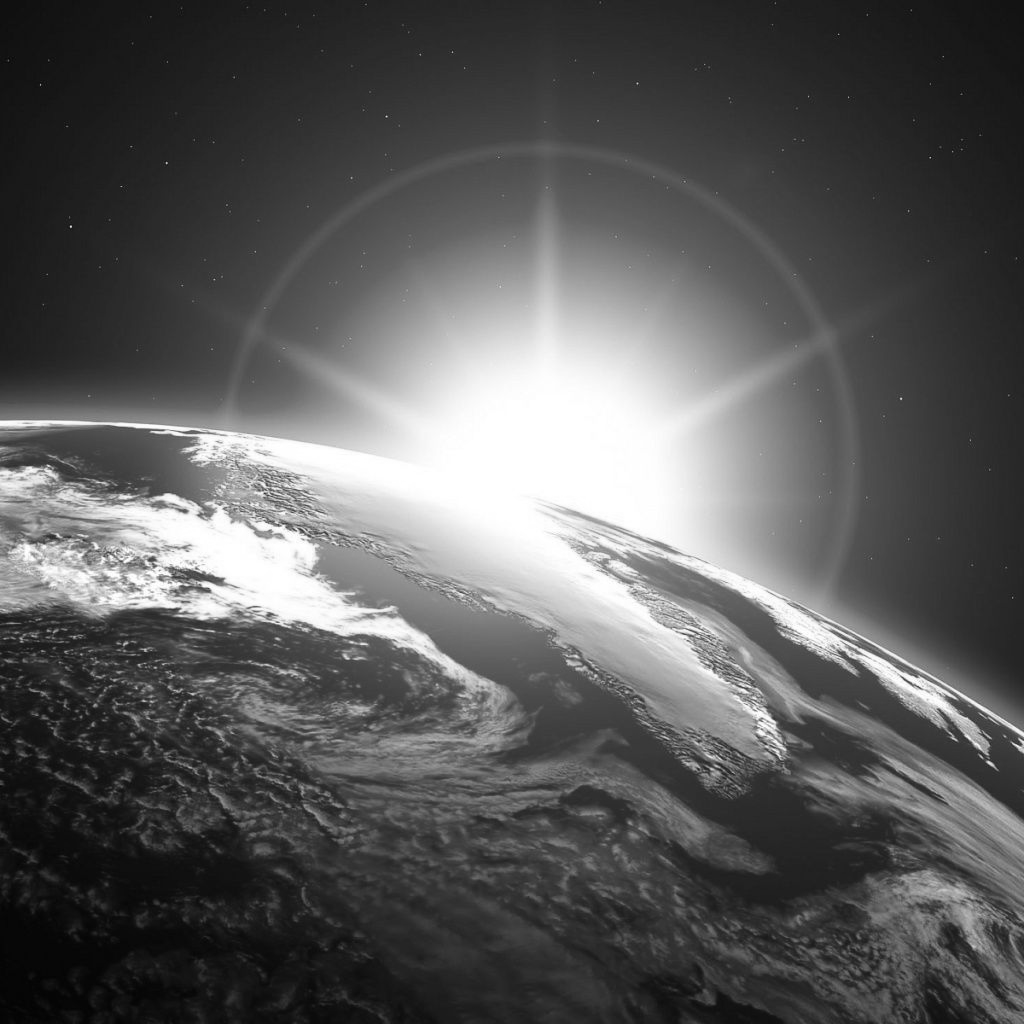

/usr/local/lib/python3.8/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


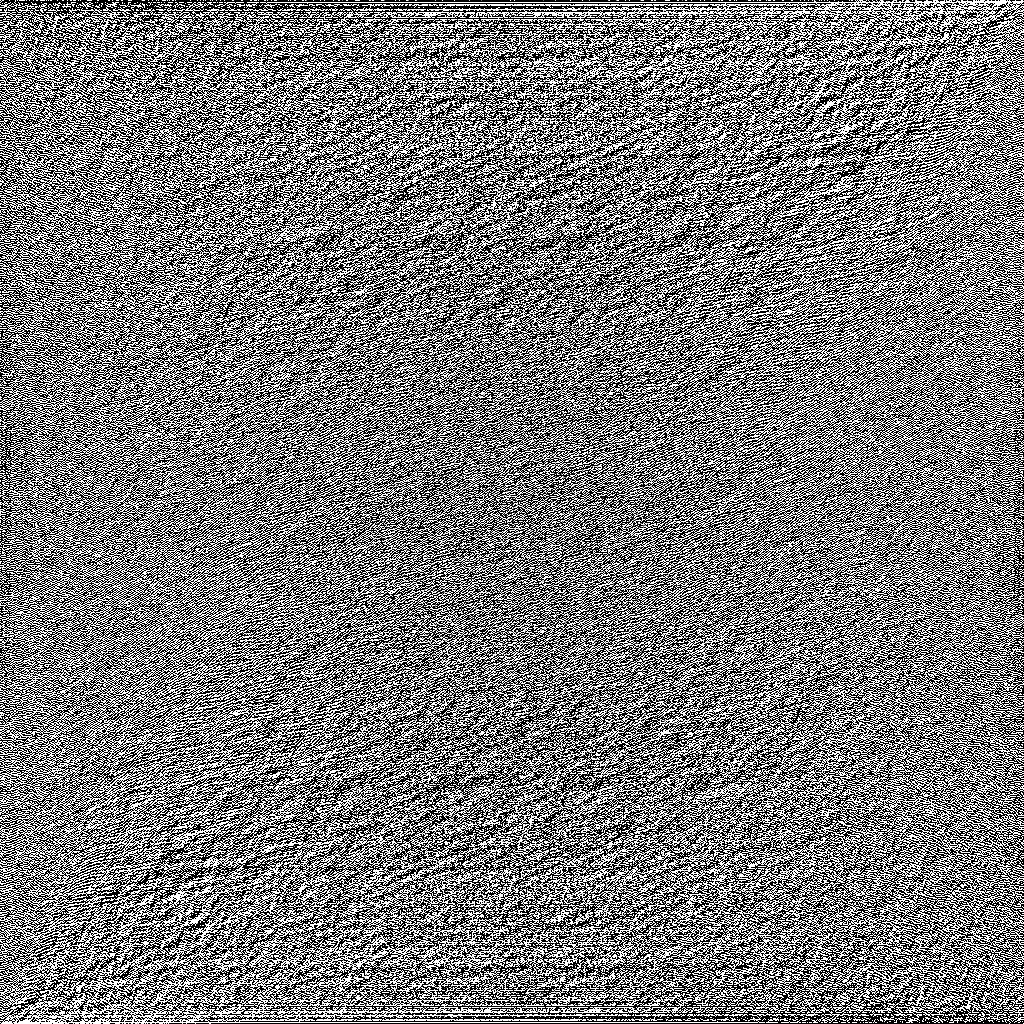

[4.6299572e+00 4.6300154e+00 5.8815536e+00 ... 3.3790916e+07 3.3790916e+07
 9.4456528e+07]


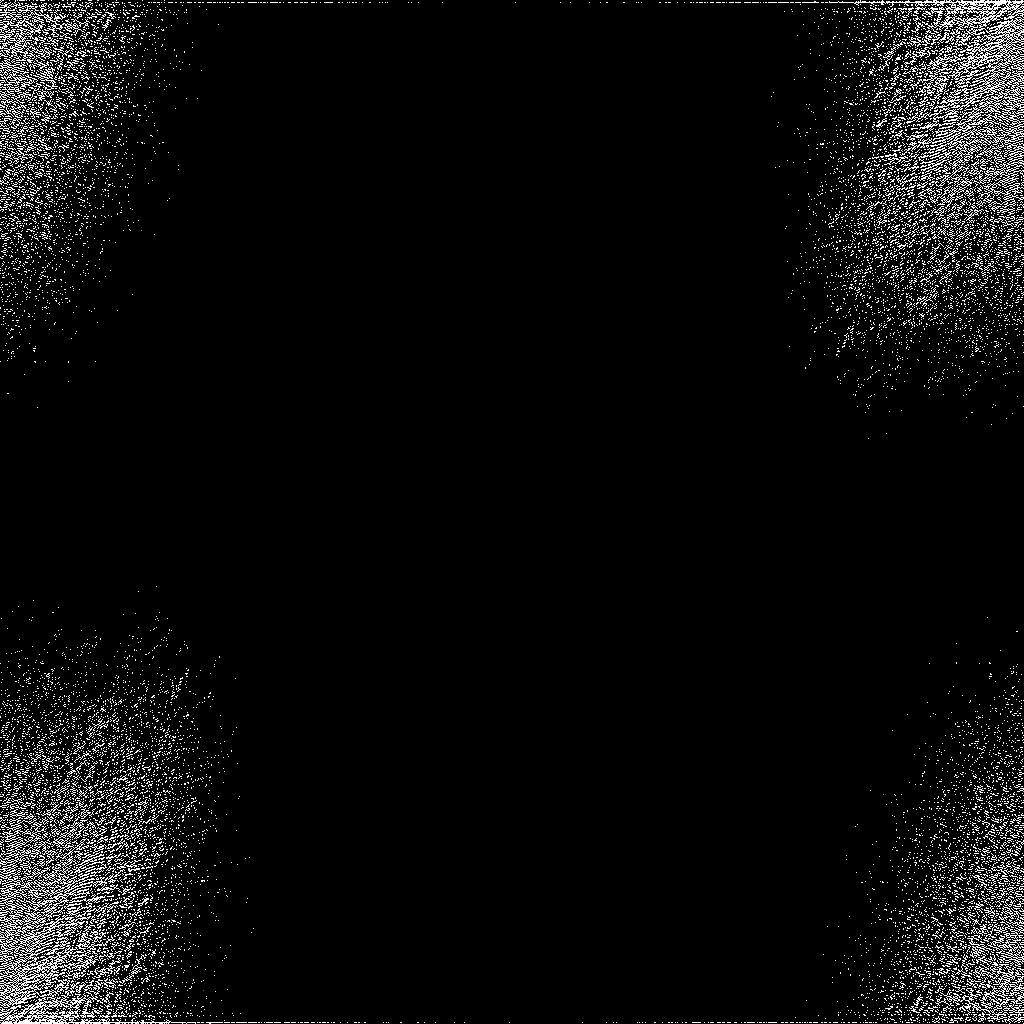

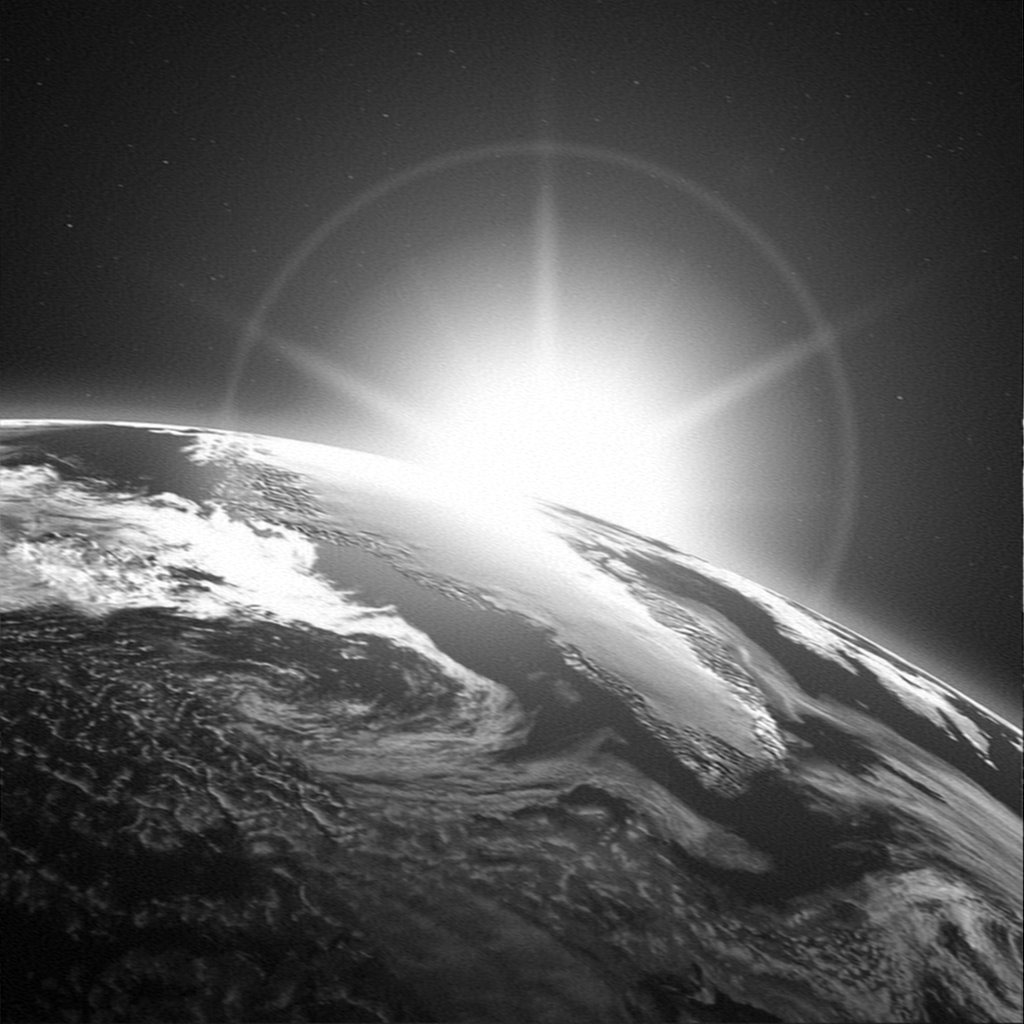

-1

In [88]:
import cv2
import numpy as np
import math
import cmath
import scipy.fftpack as sfft
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def fft(f):
  N = f.size
  if N <= 1:
    return f

  even = fft(f[0::2])
  odd = fft(f[1::2])

  tempArray = np.zeros(N).astype(np.complex64)
  for u in range(N//2):
    t = cmath.exp(2j*math.pi*u/N) * odd[u]
    tempArray[u] = even[u] + t
    tempArray[u+ N//2] = even[u] - t

  return tempArray

def ifft(f):
  N = f.size
  if N <= 1:
    return f

  even = fft(f[0::2])
  odd = fft(f[1::2])

  tempArray = np.zeros(N).astype(np.complex64)
  for u in range(N//2):
    t = cmath.exp(2j*math.pi*u/N) * odd[u]
    tempArray[u] = even[u] + t
    tempArray[u+ N//2] = even[u] - t

  tempArray = tempArray / N
  return tempArray

def fft_img(b):
  s = b.shape[0]
  tempMatrix = np.zeros((s,s)).astype(np.complex64)
  for i in range(s):
    tempMatrix[i] = fft(b[i])

  for i in range(s):
    tempMatrix[:,i] = fft(tempMatrix[:,i])
  
  return tempMatrix

def ifft_img(b):
  s = b.shape[0]
  tempMatrix = np.zeros((s,s)).astype(np.complex64)
  for i in range(s):
    tempMatrix[i] = ifft(b[i])

  for i in range(s):
    tempMatrix[:,i] = ifft(tempMatrix[:,i])
  
  return tempMatrix

def compress(img, per):
  imgSort = np.sort(np.abs(img.reshape(-1)))
  print(imgSort)
  thresh = imgSort[int(np.floor((1-per)*len(imgSort)))]
  ind = np.abs(img) > thresh
  compImg = img * ind

  return compImg

img = cv2.imread('earth.jpg')
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
b = np.asarray(grayscale)
s = b.shape[0]

tempMatrix = np.zeros((s,s)).astype(np.complex64)

cv2_imshow(b)
cv2.waitKey(0)

fft_array = fft_img(b)

cv2_imshow(fft_array)
cv2.waitKey(0)

fft_array = compress(fft_array, 0.1)

cv2_imshow(fft_array)
cv2.waitKey(0)

ifft_array = ifft_img(fft_array)

ifft_array = np.rot90(ifft_array)
ifft_array = np.rot90(ifft_array)

cv2_imshow(ifft_array)
cv2.waitKey(0)
